## Caso Viscosímetro de Cono y Placa

_G. Raush_

_Marzo 2021_

_**Departamento de Mecànica de Fluids-UPC**_

![enunciado](img/Prob_1p56FWhite.png)

#### Hipótesis

- $\sin\theta\approx\tan \theta\approx\theta$
- $\mu$ constante de cambio temperatura, sistema cuasi isotérmico
- $\omega(t=\infty) = \omega_\infty$ , régimen estacionario
- fluido newtoniano $\Rightarrow \mu$ constante

Comandos Importación de paquetes   necesarios para  el tratamiento simbólico

In [209]:
import sympy as sp
import matplotlib.pyplot as plt
from sympy.printing import latex
%matplotlib inline
sp.init_printing()

In [216]:
from IPython.display import display, Markdown, Math, Latex

def printmd(string):
    display(Markdown(string))
def printmd2(expression):
    display(Markdown(r'$$'+sp.latex(expression)+'$$'))

Definición de las variables del problema

In [249]:
r,R,theta,pi,mu = sp.symbols('r,R,theta,pi,mu',real=True,positive=True)
V = sp.Function('V')

Ley de Newton de la viscosidad

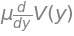

In [224]:
tau = mu*V(y).diff(y)
display(tau)

Si el espesor es pequeño $h<<r$, siendo $r$ la posición radial y $\theta$ muy pequeño se pueden dar las condiciones de un perfil cuasi lineal en cada elemento de volumen del fluido de viscosidad $\mu$.

El gradiente del perfil de velocidad es un valor constante y que solo depende de la posición radial y la distancia entre cono y placa. 

La altura de perfil, necesario para el cálculo del gradiente $\frac{d}{dy}V(y)$ valdrá:

In [219]:
h = r* sp.tan(theta)
printmd('$$h='+sp.latex(h)+'$$')

$$h=r \tan{\left(\theta \right)}$$

Pero con la hipótesis de que $\theta$ es pequeño,

In [223]:
h = r*theta
printmd('$$h\\approx '+sp.latex(h)+'$$')

$$h\approx r \theta$$

In [231]:
omega = sp.Symbol('omega')
V = omega*r
dVdy= V/h

In [232]:
printmd(r'$\frac{\text{d}}{\text{dy}}\text{V} = ' + sp.latex(dVdy)+'$')

$\frac{\text{d}}{\text{dy}}\text{V} = \frac{\omega}{\theta}$

**Observación**: La principal ventaja de este modelo de viscosímetro es que el gradiente es independiente de la posición y se mantiene constate, dependiendo solo de la velocidad $\omega$.

In [248]:
tau = mu*dVdy#.diff(y)
tau
printmd('$$\\tau ='+sp.latex(tau)+'$$')

$$\tau =\frac{\mu \omega}{\theta}$$

El diferencial de fuerza aplicada al cono por la fricción del fluid es $$dF=\tau dA$$ siendo $$dA = 2\pi r \frac{dr}{\cos\theta}$$ pero $\cos\theta\approx\,1$, entonces, $$dA = 2\pi r \, dr$$ 

In [235]:
dF = tau*2*sp.pi*r
printmd(r'$$dF = ' + sp.latex(dF)+'dr$$')


$$dF = \frac{2 \pi \mu \omega r}{\theta}dr$$

Y el momento ejercido sobre el diferencia de área del cono, $dA$ es $$dM = r \,\,dF$$

In [236]:
dM = dF * r
printmd('$$dM = '+sp.latex(dM)+'dr$$')

$$dM = \frac{2 \pi \mu \omega r^{2}}{\theta}dr$$

Integrando en $r=[0,R]$ conocemos el momento $M(t)$ 

In [242]:
R=sp.Symbol('R')
Mstat=dM.integrate((r,0,R))
printmd('$$M = '+sp.latex(Mstat)+'$$')

$$M = \frac{2 \pi R^{3} \mu \omega}{3 \theta}$$

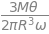

In [246]:
M=sp.Symbol('M')
muFluid=sp.solve(sp.Eq(M,Mstat),mu)[0]
muFluid

In [247]:
printmd(r'$$\mu = '+sp.latex(muFluid)+'$$')

$$\mu = \frac{3 M \theta}{2 \pi R^{3} \omega}$$

**Conclusiones**: se observa que la medida de la viscosidad solo depende de la velocidad angular, ya que el momento es una medida consecuencia de la misma. esto es una ventaja importante en la medida de fluidos no newtonianos como la sangre y las pinturas cosméticas.